In [0]:
from keras.datasets import imdb
from keras.layers import Dense,Conv1D,MaxPool1D,Embedding,Flatten,Dropout,GRU
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
vocab_size = 5000
max_len = 300
(x,y),(x_t,y_t) = imdb.load_data(num_words=5000)

In [38]:
x_p = pad_sequences(x,maxlen=300,padding="pre")
x_p_t = pad_sequences(x_t,maxlen=300,padding = "pre")
print(x[0])
print(x_p[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    

In [55]:
model = Sequential()
model.add(Embedding(vocab_size,64,input_length=max_len))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(64,activation = "relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 64)           320000    
_________________________________________________________________
flatten_4 (Flatten)          (None, 19200)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               4915456   
_________________________________________________________________
dense_11 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 5,251,969
Trainable params: 5,251,969
Non-trainable params: 0
_________________________________________________________________


In [56]:
encoder = OneHotEncoder(sparse=False)
y = y.reshape(-1,1)
y_p = encoder.fit_transform(y)
y

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [57]:
y_p

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [58]:
model.fit(x_p,y,epochs=5,validation_data=(x_p_t,y_t))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 12s 469us/step - loss: 0.3945 - acc: 0.8090 - val_loss: 0.2912 - val_acc: 0.8768
Epoch 2/5
25000/25000 [==============================] - 11s 442us/step - loss: 0.1083 - acc: 0.9612 - val_loss: 0.4369 - val_acc: 0.8478
Epoch 3/5
25000/25000 [==============================] - 11s 440us/step - loss: 0.0282 - acc: 0.9903 - val_loss: 0.5747 - val_acc: 0.8512
Epoch 4/5
25000/25000 [==============================] - 11s 440us/step - loss: 0.0198 - acc: 0.9926 - val_loss: 0.6730 - val_acc: 0.8451
Epoch 5/5
25000/25000 [==============================] - 11s 452us/step - loss: 0.0182 - acc: 0.9937 - val_loss: 0.7142 - val_acc: 0.8496


In [0]:
h = model.history.history

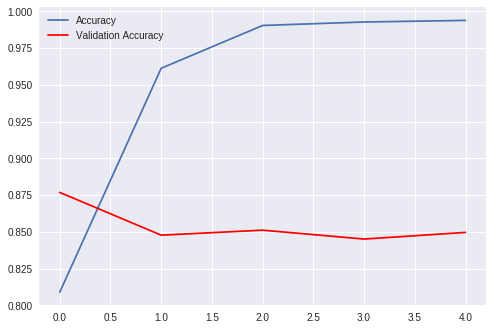

In [61]:
plt.style.use("seaborn")
plt.plot(h["acc"],label = "Accuracy")
plt.plot(h["val_acc"],label = "Validation Accuracy",c="r")
plt.legend()
plt.show()

## Implementation of CNN

In [78]:
model2 = Sequential()
model2.add(Embedding(5000,64,input_length=300))
model2.add(Conv1D(filters=32,kernel_size=30))
model2.add(MaxPool1D(pool_size=271))
model2.add(Flatten())
model2.add(Dense(256,activation="relu"))
model2.add(Dense(64,activation = "relu"))
model2.add(Dense(1,activation="sigmoid"))
model2.summary()
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 300, 64)           320000    
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 271, 32)           61472     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               8448      
_________________________________________________________________
dense_32 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 65        
Total para

In [79]:
model2.fit(x_p,y,epochs=5,validation_data=(x_p_t,y_t))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 14s 574us/step - loss: 0.4056 - acc: 0.7961 - val_loss: 0.3046 - val_acc: 0.8692
Epoch 2/5
25000/25000 [==============================] - 13s 514us/step - loss: 0.2000 - acc: 0.9239 - val_loss: 0.3087 - val_acc: 0.8694
Epoch 3/5
25000/25000 [==============================] - 13s 516us/step - loss: 0.0791 - acc: 0.9756 - val_loss: 0.4887 - val_acc: 0.8460
Epoch 4/5
25000/25000 [==============================] - 13s 513us/step - loss: 0.0407 - acc: 0.9862 - val_loss: 0.4948 - val_acc: 0.8634
Epoch 5/5
25000/25000 [==============================] - 13s 518us/step - loss: 0.0333 - acc: 0.9878 - val_loss: 0.6142 - val_acc: 0.8565


In [0]:
h2 = model2.history.history

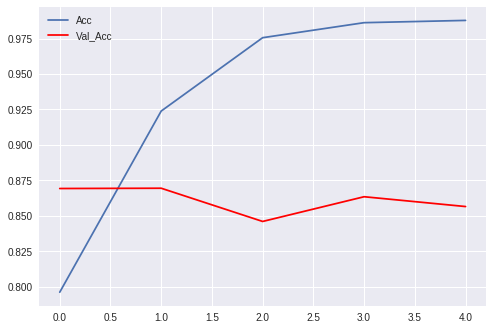

In [84]:
plt.style.use("seaborn")
plt.plot(h2["acc"],label = "Acc")
plt.plot(h2["val_acc"],label = "Val_Acc",c='r')
plt.legend()
plt.show()

# Preventing overfitting using Dropouts

In [80]:
model3 = Sequential()
model3.add(Embedding(5000,64,input_length=300))
model3.add(Conv1D(filters=32,kernel_size=30))
model3.add(MaxPool1D(pool_size=271))
model3.add(Flatten())
model3.add(Dense(256,activation="relu"))
model3.add(Dropout(rate = 0.2))
model3.add(Dense(64,activation = "relu"))
model3.add(Dense(1,activation="sigmoid"))
model3.summary()
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 300, 64)           320000    
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 271, 32)           61472     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               8448      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 64)                16448     
__________

In [81]:
model3.fit(x_p,y,epochs=5,validation_data=(x_p_t,y_t))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 14s 568us/step - loss: 0.4039 - acc: 0.7996 - val_loss: 0.2932 - val_acc: 0.8738
Epoch 2/5
25000/25000 [==============================] - 13s 521us/step - loss: 0.1978 - acc: 0.9242 - val_loss: 0.3203 - val_acc: 0.8723
Epoch 3/5
25000/25000 [==============================] - 13s 513us/step - loss: 0.0827 - acc: 0.9729 - val_loss: 0.4064 - val_acc: 0.8621
Epoch 4/5
25000/25000 [==============================] - 13s 526us/step - loss: 0.0453 - acc: 0.9834 - val_loss: 0.5273 - val_acc: 0.8642
Epoch 5/5
25000/25000 [==============================] - 14s 572us/step - loss: 0.0350 - acc: 0.9871 - val_loss: 0.4964 - val_acc: 0.8644


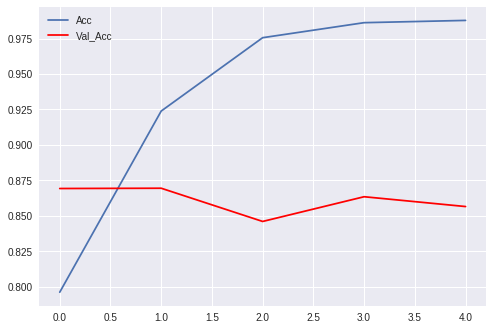

In [85]:
h3 = model3.history.history
plt.style.use("seaborn")
plt.plot(h2["acc"],label = "Acc")
plt.plot(h2["val_acc"],label = "Val_Acc",c='r')
plt.legend()
plt.show()

# Recurrent Neural Network Implementation

In [92]:
model4 = Sequential()
model4.add(Embedding(5000,64,input_length=300))
model4.add(Conv1D(filters=32,kernel_size=30))
model4.add(GRU(units = 32, dropout = 0.2,recurrent_dropout=0.2))
model4.add(Dense(1,activation="sigmoid"))
model4.summary()
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 300, 64)           320000    
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 271, 32)           61472     
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 33        
Total params: 387,745
Trainable params: 387,745
Non-trainable params: 0
_________________________________________________________________


In [93]:
model4.fit(x_p,y,epochs=5,validation_data=(x_p_t,y_t))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 634s 25ms/step - loss: 0.4704 - acc: 0.7700 - val_loss: 0.3832 - val_acc: 0.8328
Epoch 2/5
25000/25000 [==============================] - 631s 25ms/step - loss: 0.3215 - acc: 0.8625 - val_loss: 0.3908 - val_acc: 0.8310
Epoch 3/5
25000/25000 [==============================] - 627s 25ms/step - loss: 0.2096 - acc: 0.9183 - val_loss: 0.4815 - val_acc: 0.8076
Epoch 4/5
25000/25000 [==============================] - 622s 25ms/step - loss: 0.0828 - acc: 0.9718 - val_loss: 0.6379 - val_acc: 0.7959
Epoch 5/5
25000/25000 [==============================] - 620s 25ms/step - loss: 0.0249 - acc: 0.9932 - val_loss: 0.8225 - val_acc: 0.7984


In [0]:
h4 = model4.history.history

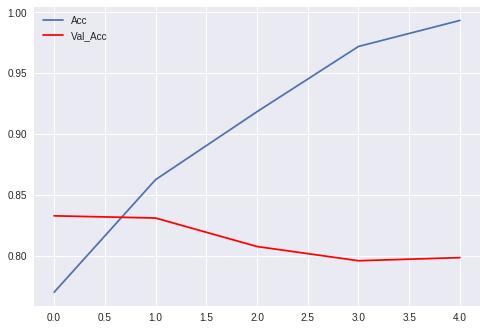

In [95]:
plt.style.use("seaborn")
plt.plot(h4["acc"],label="Acc")
plt.plot(h4["val_acc"],label="Val_Acc",c="r")
plt.legend()
plt.show()


In [102]:
model4 = Sequential()
model4.add(Embedding(5000,64,input_length=300))
model4.add(Conv1D(filters=32,kernel_size=6,strides=6))
model4.add(GRU(units = 32, dropout = 0.2,recurrent_dropout=0.2))
model4.add(Dense(1,activation="sigmoid"))
model4.summary()
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 300, 64)           320000    
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 50, 32)            12320     
_________________________________________________________________
gru_8 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 33        
Total params: 338,593
Trainable params: 338,593
Non-trainable params: 0
_________________________________________________________________


In [103]:
model4.fit(x_p,y,epochs=5,validation_data=(x_p_t,y_t))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 128s 5ms/step - loss: 0.4100 - acc: 0.8020 - val_loss: 0.3157 - val_acc: 0.8654
Epoch 2/5
25000/25000 [==============================] - 129s 5ms/step - loss: 0.2459 - acc: 0.9030 - val_loss: 0.3221 - val_acc: 0.8638
Epoch 3/5
25000/25000 [==============================] - 125s 5ms/step - loss: 0.1540 - acc: 0.9442 - val_loss: 0.3841 - val_acc: 0.8569
Epoch 4/5
25000/25000 [==============================] - 129s 5ms/step - loss: 0.0917 - acc: 0.9684 - val_loss: 0.4809 - val_acc: 0.8516
Epoch 5/5
25000/25000 [==============================] - 126s 5ms/step - loss: 0.0584 - acc: 0.9804 - val_loss: 0.5374 - val_acc: 0.8470
